In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import math

# Calgary Property Assessment

In [2]:
df_cgy = pd.read_csv('Historical_Property_Assessments__Parcel_.csv') #Read CSV file from Calgary dataset

In [3]:
df_cgy.head() #print out a sample of the dataset from the CSV file

,ROLL_YEAR,ROLL_NUMBER,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,RE_ASSESSED_VALUE,NR_ASSESSED_VALUE,FL_ASSESSED_VALUE,COMM_CODE,COMM_NAME,YEAR_OF_CONSTRUCTION,LAND_USE_DESIGNATION,PROPERTY_TYPE,LAND_SIZE_SM,LAND_SIZE_SF,LAND_SIZE_AC,SUB_PROPERTY_USE,MULTIPOLYGON
0,2005,61532909,1 10 POINT DR NW,198500.0,RE,Residential,198500.0,NaN,NaN,POI,POINT MCKAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.1448385 51.0614664, -114...."
1,2005,79500005,1 101 25 AV SW,165000.0,RE,Residential,165000.0,NaN,NaN,MIS,MISSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.0641895 51.0302823, -114...."
2,2005,200617975,1 108 ROCKYLEDGE VW NW,88500.0,RE,Residential,88500.0,NaN,NaN,ROC,ROCKY RIDGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.2507811 51.1438491, -114...."
3,2005,88507686,1 10 ST JULIEN DR SW,394000.0,RE,Residential,394000.0,NaN,NaN,ALT,ALTADORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-114.1130974 51.0172546, -114...."
4,2005,73500001,1 100 PENNSYLVANIA RD SE,101000.0,RE,Residential,101000.0,NaN,NaN,PEN,PENBROOKE MEADOWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-113.9534917 51.0524091, -113...."


In [4]:
df_cgy['PROPERTY_TYPE'].value_counts() # shows the unqiue values for community and the count

PROPERTY_TYPE
LI    3171687
LO     113712
IO        206
Name: count, dtype: int64

In [5]:
df_cgy.isna().sum #shows if there are missing values in the table

<bound method NDFrame._add_numeric_operations.<locals>.sum of          ROLL_YEAR  ROLL_NUMBER  ADDRESS  ASSESSED_VALUE  ASSESSMENT_CLASS  \
0            False        False    False           False             False   
1            False        False    False           False             False   
2            False        False    False           False             False   
3            False        False    False           False             False   
4            False        False    False           False             False   
...            ...          ...      ...             ...               ...   
8483937      False        False    False           False             False   
8483938      False        False    False           False             False   
8483939      False        False    False           False             False   
8483940      False        False    False           False             False   
8483941      False        False    False           False             False   

 

In [6]:
df_cgy['ASSESSMENT_CLASS_DESCRIPTION'].value_counts() # shows all the unique values for assessment class 

ASSESSMENT_CLASS_DESCRIPTION
Residential        8051005
Non-residential     424518
Farm land             8419
Name: count, dtype: int64

In [7]:
df_cgy.columns #shows all the columns for the calgary dataset

Index(['ROLL_YEAR', 'ROLL_NUMBER', 'ADDRESS', 'ASSESSED_VALUE',
       'ASSESSMENT_CLASS', 'ASSESSMENT_CLASS_DESCRIPTION', 'RE_ASSESSED_VALUE',
       'NR_ASSESSED_VALUE', 'FL_ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME',
       'YEAR_OF_CONSTRUCTION', 'LAND_USE_DESIGNATION', 'PROPERTY_TYPE',
       'LAND_SIZE_SM', 'LAND_SIZE_SF', 'LAND_SIZE_AC', 'SUB_PROPERTY_USE',
       'MULTIPOLYGON'],
      dtype='object')

In [8]:
property_subset_cgy = df_cgy[['ASSESSED_VALUE','ASSESSMENT_CLASS_DESCRIPTION','COMM_NAME',
       'YEAR_OF_CONSTRUCTION','LAND_SIZE_SM']] #filter out all the required columns and put into property_sunset that matches with the Edmonton dataset

In [9]:
property_subset_cgy

,ASSESSED_VALUE,ASSESSMENT_CLASS_DESCRIPTION,COMM_NAME,YEAR_OF_CONSTRUCTION,LAND_SIZE_SM
0,198500.0,Residential,POINT MCKAY,NaN,NaN
1,165000.0,Residential,MISSION,NaN,NaN
2,88500.0,Residential,ROCKY RIDGE,NaN,NaN
3,394000.0,Residential,ALTADORE,NaN,NaN
4,101000.0,Residential,PENBROOKE MEADOWS,NaN,NaN
...,...,...,...,...,...
8483937,899000.0,Residential,CRANSTON,NaN,740.2
8483938,468000.0,Residential,CARRINGTON,NaN,361.0
8483939,381500.0,Residential,CARRINGTON,NaN,310.7
8483940,380500.0,Residential,CARRINGTON,2021.0,326.4


In [10]:
property_subset_cgy.columns #shows all the columns for the new table

Index(['ASSESSED_VALUE', 'ASSESSMENT_CLASS_DESCRIPTION', 'COMM_NAME',
       'YEAR_OF_CONSTRUCTION', 'LAND_SIZE_SM'],
      dtype='object')

In [11]:
property_subset_cgy.rename(columns={'ASSESSED_VALUE': 'Assessed Value', 'ASSESSMENT_CLASS_DESCRIPTION': 'Assessment Class 1', 'COMM_NAME': 'Neighbourhood', 'YEAR_OF_CONSTRUCTION': 'Actual Year Built', 'LAND_SIZE_SM': 'Lot Size'}, inplace=True)
#renaming columns to match with the Edmonton dataset

C:\Users\659159\AppData\Local\Temp\ipykernel_22356\381869344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_subset_cgy.rename(columns={'ASSESSED_VALUE': 'Assessed Value', 'ASSESSMENT_CLASS_DESCRIPTION': 'Assessment Class 1', 'COMM_NAME': 'Neighbourhood', 'YEAR_OF_CONSTRUCTION': 'Actual Year Built', 'LAND_SIZE_SM': 'Lot Size'}, inplace=True)


In [12]:
property_subset_cgy #prints out a sample of the table with the number of rows shown for the table

,Assessed Value,Assessment Class 1,Neighbourhood,Actual Year Built,Lot Size
0,198500.0,Residential,POINT MCKAY,NaN,NaN
1,165000.0,Residential,MISSION,NaN,NaN
2,88500.0,Residential,ROCKY RIDGE,NaN,NaN
3,394000.0,Residential,ALTADORE,NaN,NaN
4,101000.0,Residential,PENBROOKE MEADOWS,NaN,NaN
...,...,...,...,...,...
8483937,899000.0,Residential,CRANSTON,NaN,740.2
8483938,468000.0,Residential,CARRINGTON,NaN,361.0
8483939,381500.0,Residential,CARRINGTON,NaN,310.7
8483940,380500.0,Residential,CARRINGTON,2021.0,326.4


In [13]:
property_subset_cgy['Assessment Class 1'].value_counts() #shows the unique values of assessment class in Calgary

Assessment Class 1
Residential        8051005
Non-residential     424518
Farm land             8419
Name: count, dtype: int64

In [14]:
residential_subset_cgy=property_subset_cgy[property_subset_cgy['Assessment Class 1']=='Residential'] #filter the assessment class to be residential only

In [15]:
residential_subset_cgy['Assessment Class 1'].value_counts() # confirms that only residential is showing for residential_subset_cgy

Assessment Class 1
Residential    8051005
Name: count, dtype: int64

## Asssessed Value Vs Actual Year Built For Calgary

In [16]:
value_construction_subset_cgy = residential_subset_cgy[['Assessed Value','Actual Year Built']] #filter out the table so only Assessed Value and Actual Year Built are shown

In [17]:
len(value_construction_subset_cgy) # shows the amount of rows before dropping null values

8051005

In [18]:
value_construction_subset_drop_cgy=value_construction_subset_cgy.dropna() # drops rows that have null values from both columns 

In [19]:
len(value_construction_subset_drop_cgy) # shows the amount of rows after dropping null values

1573472

In [20]:
year_filtered_subset_cgy = value_construction_subset_drop_cgy[(value_construction_subset_drop_cgy['Actual Year Built'] >= 2011) & (value_construction_subset_drop_cgy['Actual Year Built'] <= 2021)] 
#filter out the actual year built column so only the year 2011 to 2021 are shown. We are using a 10 year sample

In [21]:
year_filtered_subset_cgy['Actual Year Built'].value_counts() # show that the years have been filtered out for the year_filtered_subset_cgy

Actual Year Built
2013.0    48993
2014.0    45897
2012.0    40131
2015.0    38187
2011.0    34590
2018.0    28607
2016.0    28059
2017.0    24667
2019.0    18790
2020.0     6930
2021.0     4213
Name: count, dtype: int64

In [22]:
year_contruct_subset_cgy = pd.DataFrame(year_filtered_subset_cgy) #put year_filtered_subset_cgy into a new dataFrame

In [23]:
mean_value_cgy = year_contruct_subset_cgy['Assessed Value'].mean() #calculating the mean for assessed value in Calgary

In [24]:
mean_value_cgy

413716.1600243211

In [25]:
min_value_cgy = year_contruct_subset_cgy['Assessed Value'].min() #calculating the min for assessed value in Calgary 

In [26]:
min_value_cgy

0.0

In [27]:
max_value_cgy = year_contruct_subset_cgy['Assessed Value'].max() #calculating the max for assessed value in Calgary

In [28]:
max_value_cgy

179460000.0

In [29]:
std_value_cgy = year_contruct_subset_cgy['Assessed Value'].std() #calculating the standard deviation for assessed value in Calgary

In [30]:
std_value_cgy

1372365.4399377368

In [31]:
average_cgy = year_contruct_subset_cgy['Assessed Value'].sum() / len(year_contruct_subset_cgy['Assessed Value']) 
#calculating the average for assessed value in Calgary by taking the sum of asscessed value and dividing amount of rows

In [32]:
average_cgy

413716.1600243211

In [33]:
#function that formats the axis values into the millions
def millions_formatter(x, pos):
    
    return f'${x/1e6:.1f}M'

# Set the formatter function for the y-axis
formatter = mticker.FuncFormatter(millions_formatter)

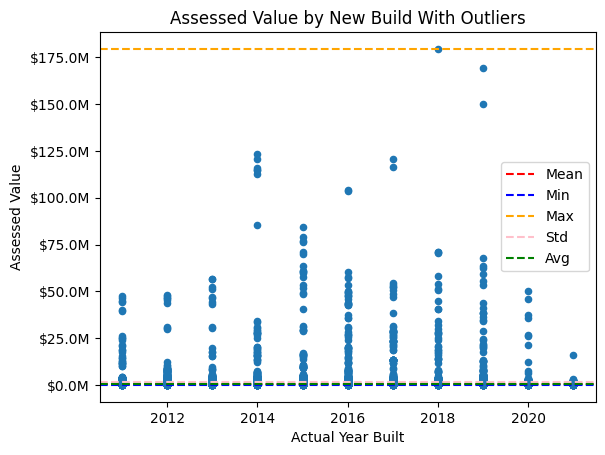

In [34]:
#Shows a graph of the homes built and the asscessed value of the homes with outliers. Dotted lines are the mean, min, max, standard deviation and the average for assessed value in Calgary
year_contruct_subset_cgy.plot(x='Actual Year Built', y='Assessed Value', kind= 'scatter') #makes a scatter plot with the x axis as actual year built and y axis as assessed value
plt.axhline(mean_value_cgy, color='red', linestyle='--', label='Mean') #plots the mean dotted line
plt.axhline(min_value_cgy, color='blue', linestyle='--', label='Min') #plots the min dotted line
plt.axhline(max_value_cgy, color='orange', linestyle='--', label='Max') #plots the max dotted line
plt.axhline(std_value_cgy, color='pink', linestyle='--', label='Std') #plots the standard deviation dotted line
plt.axhline(average_cgy, color='green', linestyle='--', label='Avg') #plots the average dotted line
plt.title("Assessed Value by New Build With Outliers") # title of the graph
plt.gca().yaxis.set_major_formatter(formatter) #change values into a million dollar value

plt.legend() #show the legend
plt.show() #show graph

In [35]:
check_values_cgy = pd.DataFrame() # create a empty dataFrame

In [36]:
year_construct_subset_cgy= year_contruct_subset_cgy.sample(n=100000) #Gets a 100 000 samples from the year_contruct_subset_cgy. This is for performance purpose for SAIT computers

In [37]:
year_construct_subset_cgy #prints out  a sample of the year_construct_subset_cgy table

,Assessed Value,Actual Year Built
2217306,571000.0,2020.0
784729,10000.0,2012.0
7227941,1000000.0,2016.0
7769275,10000.0,2014.0
2103944,599000.0,2021.0
...,...,...
7813732,265000.0,2019.0
8428566,665000.0,2011.0
7790201,615500.0,2019.0
172913,747000.0,2011.0


In [38]:
#Remove Outliers
j = 0
upper_bound = average_cgy + std_value_cgy #add the average and the standard deviation and put into upper_bound variable 
lower_bound = average_cgy - std_value_cgy #substracts the average and the standard deviation and put into lower bound variable 
for i in range(len(year_construct_subset_cgy)): #loops the entire table
    check_assesed_value = year_construct_subset_cgy.iloc[i,0] #indexes thru the row of the table for assessed value
    if( (check_assesed_value >= lower_bound) & (check_assesed_value <= upper_bound)): 
        #check of the assesed value is greater than the lower bound( average - standard deviation) and check of the upper bound ( average + standard deviation is greater than the assesed value)
        check_values_cgy.loc[j,'Assessed Value'] = year_construct_subset_cgy.iloc[i, 0] # if the conditions are true put the assessed values into the new dataFrame called check_values_cgy
        check_values_cgy.loc[j,'Actual Year Built'] = year_construct_subset_cgy.iloc[i, 1] #put actual year built into the new dataFrame called check_values_cgy if the if statement is true
        j = j + 1 #iterates thru the check_values_cgy dataFrame
        


In [39]:
check_values_cgy #print a table with the outliers removed

,Assessed Value,Actual Year Built
0,571000.0,2020.0
1,10000.0,2012.0
2,1000000.0,2016.0
3,10000.0,2014.0
4,599000.0,2021.0
...,...,...
98954,265000.0,2019.0
98955,665000.0,2011.0
98956,615500.0,2019.0
98957,747000.0,2011.0


In [40]:
output_file = 'AssessedValue_ActualYear.csv'
check_values_cgy.to_csv(output_file)

In [41]:
check_values_cgy_after = pd.DataFrame(check_values_cgy) #put the clean data into a new dataFrame called check_values_cgy_afte

In [42]:
mean_value_cgy_after = check_values_cgy_after['Assessed Value'].mean() #calculating the mean for assessed value in Calgary

In [43]:
mean_value_cgy_after

359974.2435756222

In [44]:
min_value_cgy_after = check_values_cgy_after['Assessed Value'].min() #calculating the min for assessed value in Calgary

In [45]:
min_value_cgy_after

0.0

In [46]:
max_value_cgy_after = check_values_cgy_after['Assessed Value'].max() #calculating the max for assessed value in Calgary

In [47]:
max_value_cgy_after

1780000.0

In [48]:
std_value_cgy_after = check_values_cgy_after['Assessed Value'].std() #calculating the standard deviation for assessed value in Calgary

In [49]:
std_value_cgy_after

293982.64727313374

In [50]:
average_cgy_after = check_values_cgy_after['Assessed Value'].sum() / len(check_values_cgy_after['Assessed Value']) 
#calculating the average for assessed value in Calgary by taking the sum of asscessed value and dividing amount of rows

In [51]:
average_cgy_after

359974.2435756222

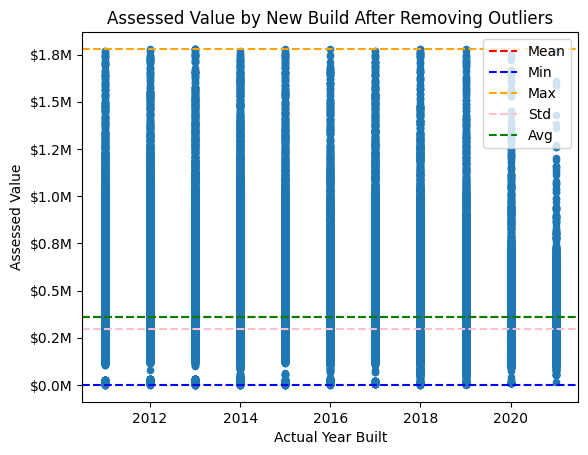

In [52]:
#Graph after removing outliers for the assessed value by actual year built

check_values_cgy_after.plot(x='Actual Year Built', y='Assessed Value', kind= 'scatter') #makes a scatter plot with the x axis as actual year built and y axis as assessed value
plt.axhline(mean_value_cgy_after, color='red', linestyle='--', label='Mean') #plots the mean dotted line
plt.axhline(min_value_cgy_after, color='blue', linestyle='--', label='Min') #plots the min dotted line
plt.axhline(max_value_cgy_after, color='orange', linestyle='--', label='Max') #plots the max dotted line
plt.axhline(std_value_cgy_after, color='pink', linestyle='--', label='Std') #plots the standard deviation dotted line
plt.axhline(average_cgy_after, color='green', linestyle='--', label='Avg') #plots the average dotted line
plt.title("Assessed Value by New Build After Removing Outliers")  # title of the graph


plt.gca().yaxis.set_major_formatter(formatter)  #change values into a million dollar value on y axis


plt.legend() #show the legend
plt.show() # show the graph

## Assessed Value VS Land Sizes For Calgary

In [53]:
land_size_cgy = residential_subset_cgy[['Assessed Value','Lot Size']] #filter so only the columns for assesed value and lot size is shown and puts into land size

In [54]:
land_size_cgy.head() #small sample of the table

,Assessed Value,Lot Size
0,198500.0,NaN
1,165000.0,NaN
2,88500.0,NaN
3,394000.0,NaN
4,101000.0,NaN


In [55]:
len(land_size_cgy) #amount of row before null values are dropped

8051005

In [56]:
land_size_drop_cgy=land_size_cgy.dropna() # drop rows that have null values on both assessed value and lot size

In [57]:
len(land_size_drop_cgy) #amount of row after null values are dropped

3131526

In [58]:
land_size_drop_cgy #sample of the data after null values were dropped

,Assessed Value,Lot Size
9,963500.0,17742.6
26,597500.0,17934.6
27,262500.0,1380.0
33,565000.0,19684.6
39,244000.0,1380.0
...,...,...
8483937,899000.0,740.2
8483938,468000.0,361.0
8483939,381500.0,310.7
8483940,380500.0,326.4


In [59]:
land_size_drop_cgy['Lot Size'].value_counts() #shows the unique value and the count for lot size

Lot Size
0.0        32152
17030.4    12690
557.2      10735
464.3      10684
557.1      10218
           ...  
2047.9         1
4151.0         1
4892.0         1
7260.0         1
17160.0        1
Name: count, Length: 16603, dtype: int64

In [60]:
year_land_subset_cgy = pd.DataFrame(land_size_drop_cgy) # put into a new dataframe

In [61]:
mean_value_land_cgy = year_land_subset_cgy['Assessed Value'].mean() #calculating the mean for assessed value in Calgary

In [62]:
mean_value_land_cgy

430723.65779878566

In [63]:
min_value_land_cgy = year_land_subset_cgy['Assessed Value'].min() #calculating the min for assessed value in Calgary

In [64]:
min_value_land_cgy

0.0

In [65]:
max_value_land_cgy = year_land_subset_cgy['Assessed Value'].max() #calculating the max for assessed value in Calgary

In [66]:
max_value_land_cgy

179460000.0

In [67]:
std_value_land_cgy = year_land_subset_cgy['Assessed Value'].std() #calculating the standard deviation for assessed value in Calgary

In [68]:
std_value_land_cgy

942339.8958029177

In [69]:
average_land_cgy = year_land_subset_cgy['Assessed Value'].sum() / len(year_land_subset_cgy['Assessed Value']) 
#calculating the average for assessed value in Calgary by taking the sum of asscessed value and dividing amount of rows

In [70]:
average_land_cgy

430723.65779878566

In [71]:
#Group lot sizes to small, medium and large 

# Defining the ranges for small, medium, and large land sizes. Values are in meter squared
small_range = (0, 50000)
medium_range = (50001, 100000)
large_range = (100001, float('inf')) # 100 001 and above

# Function to categorize the land size based on ranges
def categorize_land_size(size):
    if size >= small_range[0] and size <= small_range[1]: # if the size is between 0 - 50 000 return small
        return 'Small'
    elif size >= medium_range[0] and size <= medium_range[1]: # if the size is between 50 001 to 100 000 return medium
        return 'Medium'
    elif size >= large_range[0] and size <= large_range[1]: # if the size is between 100 001 to max return large
        return 'Large'

In [72]:
# Applies the categorization function and creates a new column called 'Land Category'
year_land_subset_cgy['Land Category'] = year_land_subset_cgy['Lot Size'].apply(categorize_land_size)

# Print a sample of the updated dataset
print(year_land_subset_cgy)

         Assessed Value  Lot Size Land Category
9              963500.0   17742.6         Small
26             597500.0   17934.6         Small
27             262500.0    1380.0         Small
33             565000.0   19684.6         Small
39             244000.0    1380.0         Small
...                 ...       ...           ...
8483937        899000.0     740.2         Small
8483938        468000.0     361.0         Small
8483939        381500.0     310.7         Small
8483940        380500.0     326.4         Small
8483941        373500.0     328.1         Small

[3131526 rows x 3 columns]


In [73]:
#give you a even dataset
year_land_subset_cgy= year_land_subset_cgy.sort_values('Lot Size') #sort the lot size by ascening order
small_divisible_calgary= math.floor(1/3*len(year_land_subset_cgy)) # splits the year_land_subset_cgy by 1/3, mulitples the year_land_subset_cgy and takes the floor value
small = [] #creates a empty array
medium = [] #creates a empty array
large = [] #creates a empty array
for i in range (len(year_land_subset_cgy)): #loops thru the entire year_land_subset_cgy table
     if i <= small_divisible_calgary : # if the floor value is greater than i then append the assessed value into the small array
             small.append(year_land_subset_cgy.iloc[i, 0])
     elif i <= small_divisible_calgary*2: # if the floor value times 2 is greater than i then append the assessed value into the medium array
              medium.append(year_land_subset_cgy.iloc[i, 0])
     else:
              large.append(year_land_subset_cgy.iloc[i, 0]) #else then append the assessed value into the large array
    

In [74]:
small_dataframe = pd.DataFrame({'Assessed Value' :  small, 'Size' : "Small"}) #put all the small array value into a new dataFrame and classy the values as small

In [75]:
small_dataframe

,Assessed Value,Size
0,26500.0,Small
1,207500.0,Small
2,207500.0,Small
3,207500.0,Small
4,25000.0,Small
...,...,...
1043838,490000.0,Small
1043839,396000.0,Small
1043840,545000.0,Small
1043841,1310000.0,Small


In [76]:
medium_dataframe = pd.DataFrame({  'Assessed Value' :  medium, 'Size' : 'Medium'}) #put all the medium array value into a new dataFrame and classy the values as medium

In [77]:
medium_dataframe

,Assessed Value,Size
0,414500.0,Medium
1,477000.0,Medium
2,482000.0,Medium
3,349000.0,Medium
4,453000.0,Medium
...,...,...
1043837,543500.0,Medium
1043838,645500.0,Medium
1043839,725000.0,Medium
1043840,473000.0,Medium


In [78]:
large_dataframe = pd.DataFrame({  'Assessed Value' :  large, 'Size' : 'Large'}) #put all the large array value into a new dataFrame and classy the values as large

In [79]:
large_dataframe

,Assessed Value,Size
0,362500.0,Large
1,1210000.0,Large
2,515500.0,Large
3,389500.0,Large
4,705000.0,Large
...,...,...
1043836,893500.0,Large
1043837,4180000.0,Large
1043838,29600000.0,Large
1043839,64580000.0,Large


In [80]:
merged_df_cgy = pd.concat([small_dataframe, medium_dataframe, large_dataframe]) #Concatenates all 3 dataFrames and put into a one dataframe

In [81]:
merged_df_cgy # sample of the concatenate data

,Assessed Value,Size
0,26500.0,Small
1,207500.0,Small
2,207500.0,Small
3,207500.0,Small
4,25000.0,Small
...,...,...
1043836,893500.0,Large
1043837,4180000.0,Large
1043838,29600000.0,Large
1043839,64580000.0,Large


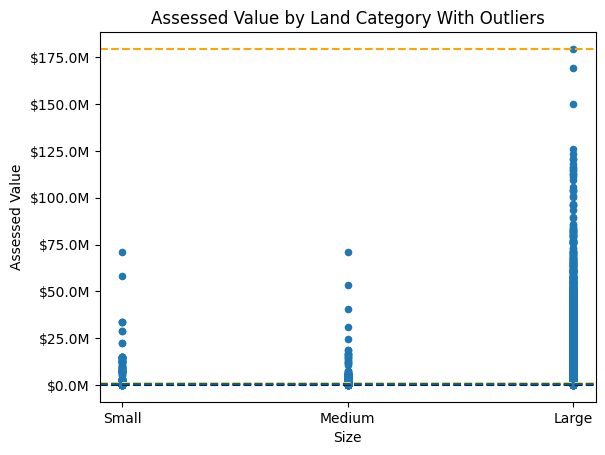

In [82]:
#Shows a graph of the homes built and the land category of the homes
merged_df_cgy.plot(x='Size', y='Assessed Value', kind='scatter') #creates a scatter plot with the new concatenate data
plt.axhline(mean_value_land_cgy, color='red', linestyle='--', label='Mean') #plots the mean dotted line
plt.axhline(min_value_land_cgy, color='blue', linestyle='--', label='Min') #plots the min dotted line
plt.axhline(max_value_land_cgy, color='orange', linestyle='--', label='Max') #plots the max dotted line
plt.axhline(std_value_land_cgy, color='pink', linestyle='--', label='Std') #plots the standard deviation dotted line
plt.axhline(average_land_cgy, color='green', linestyle='--', label='Avg') #plots the average dotted line
plt.title("Assessed Value by Land Category With Outliers") # title of the graph

plt.gca().yaxis.set_major_formatter(formatter) #change values into a million dollar value

#plt.legend()
plt.show()

In [83]:
small_array = [] #creates a empty array
medium_array = [] #creates a empty array
large_array = [] #creates a empty array
countsmall= 0 #intialize to zero
countmedium = 0 #intialize to zero
countlarge =0#intialize to zero
for i in range(len(year_land_subset_cgy)): #loops thru the entire year_land_subset_cgy table
    if year_land_subset_cgy.iloc[i,2] == "Small"  : #looks at the 2nd columns of year_land_subset_cgy and if it matches with Small
         small_array.append(year_land_subset_cgy.iloc[i,0]) #if true then append the assessed value to the small_array
         countsmall = countsmall +1 #adds one to countsmall
    elif year_land_subset_cgy.iloc[i,2] == "Medium"  : #looks at the 2nd columns of year_land_subset_cgy and if it matches with Medium
         medium_array.append(year_land_subset_cgy.iloc[i,0]) #if true then append the assessed value to the medium_array
         countmedium = countmedium + 1 #adds one to countmedium
    else:
         large_array.append(year_land_subset_cgy.iloc[i,0]) #else then append the assessed value to the large_array
         countlarge = countlarge + 1 #adds one to countlarge



In [84]:
#function for finding outliers
def find_outliers(data, threshold=1):
    z_scores = (data - np.mean(data)) / np.std(data) #calculates the z score
    outliers = np.abs(z_scores) > threshold # calculating the absolute value of the z score and see if its bigger than the threshold
    return outliers #returns true or false

smalloutliers = find_outliers(small_array) #find outlier for small_array
mediumoutliers = find_outliers(medium_array) #find outlier for medium_array
largeoutliers = find_outliers(large_array) #find outlier for large_array

In [85]:
fixed_small_array = [] #creates a empty array
fixed_medium_array = [] #creates a empty array
fixed_large_array = [] #creates a empty array

for i in range(len(small_array)): #loops thru the small_array
      if smalloutliers[i] == False: #checks if the index of i in the small outlier array is false
           fixed_small_array.append(small_array[i]) #if the index of the small outlier array is false then append the index of i of the small_array to the fixed_small_array 
      else: #else move on to the next index 
               pass

for i in range(len(medium_array)): #loops thru the medium_array
      if mediumoutliers[i] == False: #checks if the index of i in the medium outlier array is false
           fixed_medium_array.append(medium_array[i]) #if the index of the medium outlier array is false then append the index of i of the medium_array to the fixed_medium_array 
      else: #else move on to the next index 
               pass

for i in range(len(large_array)): #loops thru the large_array
      if largeoutliers[i] == False: #checks if the index of i in the large outlier array is false
           fixed_large_array.append(large_array[i]) #if the index of the large outlier array is false then append the index of i of the large_array to the fixed_large_array
      else:
               pass 

In [86]:
small_dataframe = pd.DataFrame({'Assessed Value' :  fixed_small_array, 'Size' : "Small"}) #put all the fixed_small_array values into a new dataFrame and classy the values as Small

In [87]:
medium_dataframe = pd.DataFrame({'Assessed Value' :  fixed_medium_array, 'Size' : "Medium"}) #put all the fixed_medium_array values into a new dataFrame and classy the values as Medium

In [88]:
large_dataframe = pd.DataFrame({'Assessed Value' :  fixed_large_array, 'Size' : "Large"}) #put all the fixed_large_array values into a new dataFrame and classy the values as Large

In [89]:
merged_df_cgy = pd.concat([small_dataframe, medium_dataframe, large_dataframe]) #Concatenates all 3 dataFrames and put into a one dataframe

In [90]:
merged_df_cgy # sample of the concatenate data

,Assessed Value,Size
0,26500.0,Small
1,207500.0,Small
2,207500.0,Small
3,207500.0,Small
4,25000.0,Small
...,...,...
1495,724500.0,Large
1496,778500.0,Large
1497,893500.0,Large
1498,4180000.0,Large


In [91]:
output_file_10 = 'AssessedValue_Size_CGY.csv'
merged_df_cgy.to_csv(output_file_10)

In [92]:
average_small = np.average(fixed_small_array) # Calculates average of all the values in  the fixed small array
average_medium = np.average(fixed_medium_array) # Calculates average of all the values in  the fixed medium array
average_large = np.average(fixed_large_array) # Calculates average of all the values in  the fixed large array

In [93]:
smalloutliers

array([False, False, False, ...,  True,  True,  True])

In [94]:
average_small 

383844.5729138082

In [95]:
average_medium

281640.3590001831

In [96]:
average_large

3162181.336

In [97]:
std_small= np.std(fixed_small_array)

In [98]:
std_small

224794.47911724853

In [99]:
std_medium= np.std(fixed_medium_array)

In [100]:
std_medium

299142.7587388476

In [101]:
std_medium

299142.7587388476

In [102]:
std_high= np.std(fixed_large_array)

In [103]:
std_high

4924402.685159416

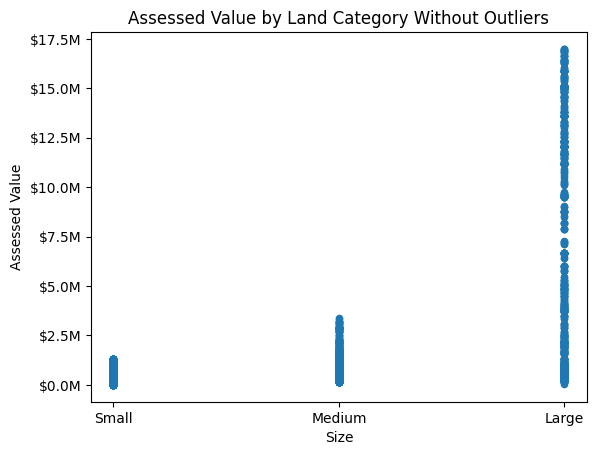

In [104]:
#Shows a graph of the homes built and the land category of the homes without outliers
merged_df_cgy.plot(x='Size', y='Assessed Value', kind='scatter') #creates a scatter plot with the new concatenate data
plt.title("Assessed Value by Land Category Without Outliers")
plt.gca().yaxis.set_major_formatter(formatter)

#plt.legend()
plt.show()

## Assessed Value vs Neighbourhood in Calgary

In [105]:
value_neighbourhood_subset_cgy = residential_subset_cgy[['Assessed Value','Neighbourhood','Actual Year Built','Lot Size']] #filter out the table so only Assessed Value and Neighbourhood are shown

In [106]:
value_neighbourhood_subset_cgy

,Assessed Value,Neighbourhood,Actual Year Built,Lot Size
0,198500.0,POINT MCKAY,NaN,NaN
1,165000.0,MISSION,NaN,NaN
2,88500.0,ROCKY RIDGE,NaN,NaN
3,394000.0,ALTADORE,NaN,NaN
4,101000.0,PENBROOKE MEADOWS,NaN,NaN
...,...,...,...,...
8483937,899000.0,CRANSTON,NaN,740.2
8483938,468000.0,CARRINGTON,NaN,361.0
8483939,381500.0,CARRINGTON,NaN,310.7
8483940,380500.0,CARRINGTON,2021.0,326.4


In [107]:
len(value_neighbourhood_subset_cgy) # amount of rows before null values are dropped

8051005

In [108]:
value_neighbourhood_subset_drop_cgy=value_neighbourhood_subset_cgy.dropna() # drops rows that have null values from both columns 

In [109]:
len(value_neighbourhood_subset_drop_cgy) # amount of rows after null values are dropped

1573428

In [110]:
value_neighbourhood_subset_drop_cgy

,Assessed Value,Neighbourhood,Actual Year Built,Lot Size
26,597500.0,SADDLE RIDGE,1972.0,17934.6
27,262500.0,CRESCENT HEIGHTS,2003.0,1380.0
33,565000.0,SADDLE RIDGE,1960.0,19684.6
39,244000.0,CRESCENT HEIGHTS,2003.0,1380.0
45,710500.0,SADDLE RIDGE,2003.0,17740.4
...,...,...,...,...
8483920,10000.0,SAGE HILL,2019.0,8020.5
8483921,10000.0,SAGE HILL,2019.0,8020.5
8483922,10000.0,SAGE HILL,2019.0,8020.5
8483923,2220000.0,SAGE HILL,2019.0,8020.5


In [111]:
output_file_4 = 'AssessedValue_Neighbourhood_CGY.csv'
value_neighbourhood_subset_drop_cgy.to_csv(output_file_4)

# Edmonton Property Assessment

In [112]:
df = pd.read_csv('Property_Assessment_Data__Historical_.csv') #read CSV file from Edmonton dataset

C:\Users\659159\AppData\Local\Temp\ipykernel_22356\3211134125.py:1: DtypeWarning: Columns (2,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Property_Assessment_Data__Historical_.csv') #read CSV file from Edmonton dataset


In [113]:
df.dtypes

Account Number            int64
Assessment Year           int64
Suite                    object
House Number            float64
Street Name              object
Legal Description        object
Latitude                float64
Longitude               float64
Point Location           object
Neighbourhood            object
Actual Year Built       float64
Garage                   object
Zoning                   object
Lot Size                float64
Assessed Value          float64
Assessment Class 1       object
Assessment Class % 1    float64
Assessment Class 2       object
Assessment Class % 2    float64
Assessment Class 3       object
Assessment Class % 3    float64
dtype: object

In [114]:
pd.set_option('display.max_columns', None) #display all the columns
df.head() #sample of data

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
0,1012590,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRAL MCDOUGALL,1980.0,N,US,0.000,500.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN
1,10773899,2018,212,5816.0,MULLEN PLACE NW,Plan: 1620778 Unit: 86,NaN,NaN,NaN,MACTAGGART,2016.0,N,RA7,118.525,275000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
2,10773926,2018,314,5816.0,MULLEN PLACE NW,Plan: 1620778 Unit: 113,NaN,NaN,NaN,MACTAGGART,2016.0,N,RA7,66.805,177500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3,10774678,2018,NaN,10236.0,79 STREET NW,Plan: 1620834 Block: 24 Lot: 9A,NaN,NaN,NaN,FOREST HEIGHTS,2015.0,Y,RF3,355.992,484000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
4,10774755,2019,NaN,12617.0,45 STREET NW,Plan: 1620841 Block: 28 Lot: 5,NaN,NaN,NaN,HOMESTEADER,2016.0,Y,RF5,265.284,331500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN


In [115]:
df.isna().sum #shows missing values

<bound method NDFrame._add_numeric_operations.<locals>.sum of          Account Number  Assessment Year  Suite  House Number  Street Name  \
0                 False            False   True          True         True   
1                 False            False  False         False        False   
2                 False            False  False         False        False   
3                 False            False   True         False        False   
4                 False            False   True         False        False   
...                 ...              ...    ...           ...          ...   
4217606           False            False  False         False        False   
4217607           False            False   True         False        False   
4217608           False            False   True         False        False   
4217609           False            False   True         False        False   
4217610           False            False   True         False        False   

 

In [116]:
len(df.index)

4217611

In [117]:
df.columns

Index(['Account Number', 'Assessment Year', 'Suite', 'House Number',
       'Street Name', 'Legal Description', 'Latitude', 'Longitude',
       'Point Location', 'Neighbourhood', 'Actual Year Built', 'Garage',
       'Zoning', 'Lot Size', 'Assessed Value', 'Assessment Class 1',
       'Assessment Class % 1', 'Assessment Class 2', 'Assessment Class % 2',
       'Assessment Class 3', 'Assessment Class % 3'],
      dtype='object')

In [118]:
df['Assessment Class 1'].value_counts() #show unique values for Assessment Class 1

Assessment Class 1
RESIDENTIAL                       3940427
COMMERCIAL                         227655
OTHER RESIDENTIAL                   43948
FARMLAND                             5221
NONRES MUNICIPAL/RES EDUCATION         10
DESIGNATED IND PROPERTIES               1
Name: count, dtype: int64

In [119]:
df['Assessment Class 2'].value_counts() #show unique values for Assessment Class 2

Assessment Class 2
COMMERCIAL                        3701
FARMLAND                          3061
RESIDENTIAL                       2375
OTHER RESIDENTIAL                 1506
NONRES MUNICIPAL/RES EDUCATION       1
Name: count, dtype: int64

In [120]:
df['Assessment Class 3'].value_counts() #show unique values for Assessment Class 3

Assessment Class 3
FARMLAND                          1144
RESIDENTIAL                        358
COMMERCIAL                         295
OTHER RESIDENTIAL                   24
NONRES MUNICIPAL/RES EDUCATION       5
Name: count, dtype: int64

In [121]:
property_subset = df[['Neighbourhood', 'Actual Year Built', 'Lot Size', 'Assessed Value', 'Assessment Class 1']]
#filter out all the required columns and put into property_sunset

In [122]:
property_subset

,Neighbourhood,Actual Year Built,Lot Size,Assessed Value,Assessment Class 1
0,CENTRAL MCDOUGALL,1980.0,0.000,500.0,COMMERCIAL
1,MACTAGGART,2016.0,118.525,275000.0,RESIDENTIAL
2,MACTAGGART,2016.0,66.805,177500.0,RESIDENTIAL
3,FOREST HEIGHTS,2015.0,355.992,484000.0,RESIDENTIAL
4,HOMESTEADER,2016.0,265.284,331500.0,RESIDENTIAL
...,...,...,...,...,...
4217606,LAUREL,2020.0,197.666,272000.0,RESIDENTIAL
4217607,KESWICK AREA,NaN,367.869,172500.0,RESIDENTIAL
4217608,THE ORCHARDS AT ELLERSLIE,NaN,310.333,128500.0,RESIDENTIAL
4217609,CHAPPELLE AREA,NaN,619.282,177000.0,RESIDENTIAL


In [123]:
residential_subset = property_subset[property_subset['Assessment Class 1'] == 'RESIDENTIAL'] #filter the assessment class to be residential only

In [124]:
residential_subset

,Neighbourhood,Actual Year Built,Lot Size,Assessed Value,Assessment Class 1
1,MACTAGGART,2016.0,118.525,275000.0,RESIDENTIAL
2,MACTAGGART,2016.0,66.805,177500.0,RESIDENTIAL
3,FOREST HEIGHTS,2015.0,355.992,484000.0,RESIDENTIAL
4,HOMESTEADER,2016.0,265.284,331500.0,RESIDENTIAL
5,HOMESTEADER,2016.0,207.691,322000.0,RESIDENTIAL
...,...,...,...,...,...
4217606,LAUREL,2020.0,197.666,272000.0,RESIDENTIAL
4217607,KESWICK AREA,NaN,367.869,172500.0,RESIDENTIAL
4217608,THE ORCHARDS AT ELLERSLIE,NaN,310.333,128500.0,RESIDENTIAL
4217609,CHAPPELLE AREA,NaN,619.282,177000.0,RESIDENTIAL


In [125]:
residential_subset.head()

,Neighbourhood,Actual Year Built,Lot Size,Assessed Value,Assessment Class 1
1,MACTAGGART,2016.0,118.525,275000.0,RESIDENTIAL
2,MACTAGGART,2016.0,66.805,177500.0,RESIDENTIAL
3,FOREST HEIGHTS,2015.0,355.992,484000.0,RESIDENTIAL
4,HOMESTEADER,2016.0,265.284,331500.0,RESIDENTIAL
5,HOMESTEADER,2016.0,207.691,322000.0,RESIDENTIAL


In [126]:
residential_subset['Assessment Class 1'].value_counts() #verify that assessement class is filtered

Assessment Class 1
RESIDENTIAL    3940427
Name: count, dtype: int64

In [127]:
len(residential_subset.index)

3940427

In [128]:
residential_subset.columns

Index(['Neighbourhood', 'Actual Year Built', 'Lot Size', 'Assessed Value',
       'Assessment Class 1'],
      dtype='object')

In [129]:
residential_subset.head()

,Neighbourhood,Actual Year Built,Lot Size,Assessed Value,Assessment Class 1
1,MACTAGGART,2016.0,118.525,275000.0,RESIDENTIAL
2,MACTAGGART,2016.0,66.805,177500.0,RESIDENTIAL
3,FOREST HEIGHTS,2015.0,355.992,484000.0,RESIDENTIAL
4,HOMESTEADER,2016.0,265.284,331500.0,RESIDENTIAL
5,HOMESTEADER,2016.0,207.691,322000.0,RESIDENTIAL


In [130]:
residential_subset['Neighbourhood'].value_counts() #show all the unique values for Neighbourhood

Neighbourhood
OLIVER                              122742
DOWNTOWN                             95792
RUTHERFORD                           55425
SUMMERSIDE                           51858
WINDERMERE                           51370
                                     ...  
LAKE DISTRICT NORTH EAST PORTION         2
MILL CREEK RAVINE                        2
CPR WEST                                 1
CORONET ADDITION INDUSTRIAL              1
RURAL NORTH WEST                         1
Name: count, Length: 384, dtype: int64

In [131]:
residential_subset['Assessment Class 1'].value_counts()

Assessment Class 1
RESIDENTIAL    3940427
Name: count, dtype: int64

## Asssessed Value vs Acutal Year Build for Edmonton

In [132]:
year_of_constrct = residential_subset[['Assessed Value','Actual Year Built']] #filter out so only assessed value and actual year built columns are showing

In [133]:
year_of_constrct.head()

,Assessed Value,Actual Year Built
1,275000.0,2016.0
2,177500.0,2016.0
3,484000.0,2015.0
4,331500.0,2016.0
5,322000.0,2016.0


In [134]:
year_of_constrct.describe()

,Assessed Value,Actual Year Built
count,3.940427e+06,3.810413e+06
mean,3.175183e+05,1.987734e+03
std,3.018516e+05,2.210891e+01
min,0.000000e+00,1.900000e+03
25%,1.855000e+05,1.972000e+03
50%,3.155000e+05,1.992000e+03
75%,4.080000e+05,2.006000e+03
max,4.952500e+07,2.022000e+03


In [135]:
len(year_of_constrct) # number of rows before null values are dropped

3940427

In [136]:
year_of_constrct_drop=year_of_constrct.dropna() #drops row that have null values from the assessed value and actual year built columns

In [137]:
len(year_of_constrct_drop) # number of rows after null values are dropped

3810413

In [138]:
year_filtered_subset = year_of_constrct_drop[(year_of_constrct_drop['Actual Year Built'] >= 2011) & (year_of_constrct_drop['Actual Year Built'] <= 2021)]
#filter out the actual year built columns so the year 2011 to 2021 are shown. We are using a 10 year sample

In [139]:
year_filtered_subset['Actual Year Built'].value_counts() #verifies the years are filtered out

Actual Year Built
2014.0    112263
2011.0     94638
2013.0     83862
2016.0     74602
2012.0     63041
2015.0     60511
2017.0     36436
2018.0     30316
2019.0     22113
2020.0     14546
2021.0      7030
Name: count, dtype: int64

In [140]:
year_contruct_subset = pd.DataFrame(year_filtered_subset) #put year_filtered_subset into a new dataframe called year_construct_subset

In [141]:
mean_value = year_contruct_subset['Assessed Value'].mean() #calculating the mean for assessed value in Edmonton

In [142]:
min_value = year_contruct_subset['Assessed Value'].min() #calculating the min for assessed value in Edmonton

In [143]:
max_value = year_contruct_subset['Assessed Value'].max() #calculating the max for assessed value in Edmonton

In [144]:
max_value

14234500.0

In [145]:
std_value = year_contruct_subset['Assessed Value'].std() #calculating the standard deviation for assessed value in Edmonton

In [146]:
average_edm = year_contruct_subset['Assessed Value'].sum() / len(year_contruct_subset['Assessed Value'])
#calculating the average for assessed value in Edmonton by taking the sum of asscessed value and dividing amount of rows

C:\Users\659159\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


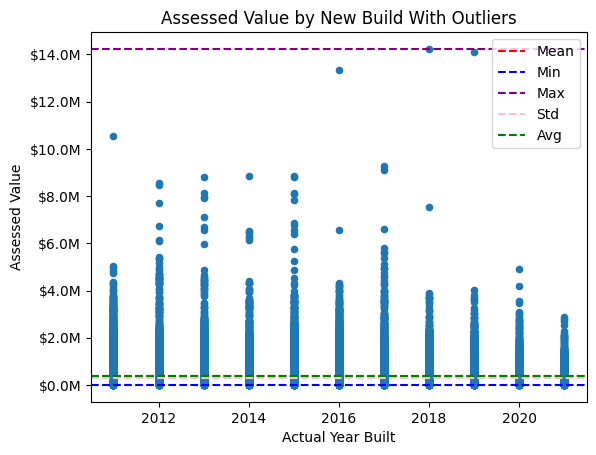

In [147]:
#Shows a graph of the homes built and the asscessed value of the homes with outliers
year_contruct_subset.plot(x='Actual Year Built', y='Assessed Value', kind= 'scatter') # builds a scatter plot
plt.axhline(mean_value, color='red', linestyle='--', label='Mean') #plots the mean dotted line
plt.axhline(min_value, color='blue', linestyle='--', label='Min') #plots the min dotted line
plt.axhline(max_value, color='purple', linestyle='--', label='Max') #plots the max dotted line
plt.axhline(std_value, color='pink', linestyle='--', label='Std') #plots the standard deviation dotted line
plt.axhline(average_edm, color='green', linestyle='--', label='Avg') #plots the average dotted line
plt.title("Assessed Value by New Build With Outliers") # title of the graph

plt.gca().yaxis.set_major_formatter(formatter) #change values into a million dollar value
plt.legend() #show legend
plt.show() #show graph


In [148]:
check_values_edm = pd.DataFrame() #created a new dataFrame

In [149]:
year_construct_subset= year_contruct_subset.sample(n=100000) #10 0000 samples. This is for performance purpose

In [150]:
#Remove Outliers for Edmonton Dataset by Actual Year Built
j = 0
upper_bound = average_edm + std_value #add the average and the standard deviation and put into upper_bound variable 
lower_bound = average_edm - std_value #substracts the average and the standard deviation and put into lower bound variable 
for i in range(len(year_construct_subset)): #loops the entire table
    check_assesed_value = year_construct_subset.iloc[i,0] #indexes thru the row of the table for assessed value
    if( (check_assesed_value >= lower_bound) & (check_assesed_value <= upper_bound)):
         #check of the assesed value is greater than the lower bound( average - standard deviation) and check of the upper bound ( average + standard deviation is greater than the assesed value)
        check_values_edm.loc[j,'Assessed Value'] = year_construct_subset.iloc[i, 0] # if the conditions are true put the assessed values into the new dataFrame called check_values_edm
        check_values_edm.loc[j,'Actual Year Built'] = year_construct_subset.iloc[i, 1] #put actual year built into the new dataFrame called check_values_edm if the if statement is true
        j = j + 1
        


In [151]:
check_values_edm #prints a sample of the dataFrame

,Assessed Value,Actual Year Built
0,456000.0,2013.0
1,365500.0,2015.0
2,523000.0,2012.0
3,469000.0,2012.0
4,318000.0,2013.0
...,...,...
75615,190500.0,2013.0
75616,341000.0,2018.0
75617,354000.0,2012.0
75618,187500.0,2014.0


In [152]:
output_file_3 = 'AssessedValue_ActualYearBuild_EDM.csv'
check_values_edm.to_csv(output_file_3)

In [153]:
check_values_edm_after = pd.DataFrame(check_values_edm) #puts into a new dataFrame

In [154]:
mean_value_after = check_values_edm_after['Assessed Value'].mean() #calculating the mean for assessed value in Edmonton

In [155]:
min_value_after = check_values_edm_after['Assessed Value'].min() #calculating the mean for assessed value in Edmonton

In [156]:
max_value_after = check_values_edm_after['Assessed Value'].max() #calculating the mean for assessed value in Edmonton

In [157]:
std_value_after = check_values_edm_after['Assessed Value'].std() #calculating the mean for assessed value in Edmonton

In [158]:
average_edm_after = check_values_edm_after['Assessed Value'].sum() / len(check_values_edm_after['Assessed Value'])
#calculating the average for assessed value in Edmonton by taking the sum of asscessed value and dividing amount of rows

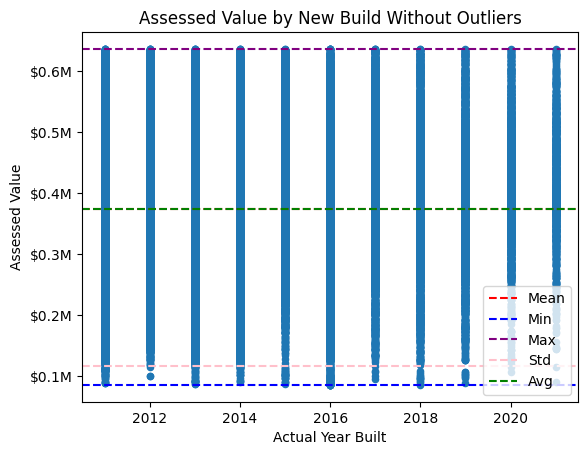

In [159]:
#Shows a graph of the homes built and the asscessed value of the homes without Outliers
check_values_edm_after.plot(x='Actual Year Built', y='Assessed Value', kind= 'scatter') #creates a scatter  plot
plt.axhline(mean_value_after, color='red', linestyle='--', label='Mean') #plots the mean dotted line
plt.axhline(min_value_after, color='blue', linestyle='--', label='Min') #plots the min dotted line
plt.axhline(max_value_after, color='purple', linestyle='--', label='Max') #plots the max dotted line
plt.axhline(std_value_after, color='pink', linestyle='--', label='Std') #plots the standard deviation dotted line
plt.axhline(average_edm_after, color='green', linestyle='--', label='Avg') #plots the average dotted line
plt.title("Assessed Value by New Build Without Outliers") # title of the graph
plt.gca().yaxis.set_major_formatter(formatter) #change values into a million dollar value
plt.legend() #shows the legend
plt.show() # show the graph

## Assessed Value VS Lot Size For Edmonton

In [160]:
land_size = residential_subset[['Assessed Value','Lot Size']] # show the columns Assessed Value and Lot Size

In [161]:
len(land_size) # number of rows before null values are dropped

3940427

In [162]:
land_size_drop=land_size.dropna() #drops row that have null values from the land size and actual year built columns

In [163]:
len(land_size_drop) # number of rows after null values are dropped

3909942

In [164]:
land_size_drop['Lot Size'].value_counts() #shows unique vales for lot size

Lot Size
0.0000         8963
4.5990         5115
1.4265         4510
3.0610         4389
0.2090         3927
               ... 
38.7130           1
116903.6200       1
121240.2910       1
186755.7170       1
396.7270          1
Name: count, Length: 208533, dtype: int64

In [165]:
year_land_subset = pd.DataFrame(land_size_drop) #Put the land_size_drop into a new dataframe called year_land_subset

In [166]:
mean_value_land = year_land_subset['Assessed Value'].mean() #calculating the mean for assessed value in Edmonton from the year_land_subset

In [167]:
min_value_land = year_land_subset['Assessed Value'].min() #calculating the min for assessed value in Edmonton from the year_land_subset

In [168]:
max_value_land = year_land_subset['Assessed Value'].max() #calculating the max for assessed value in Edmonton from the year_land_subset

In [169]:
max_value_land

49525000.0

In [170]:
std_value_land = year_land_subset['Assessed Value'].std() #calculating the standard deviation for assessed value in Edmonton from the year_land_subset

In [171]:
average_land = year_land_subset['Assessed Value'].sum() / len(year_land_subset['Assessed Value']) #calculating the average for assessed value in Edmonton from the year_land_subset

In [172]:
# Apply the categorization function to create a new column 'Land Category'
year_land_subset['Land Category'] = year_land_subset['Lot Size'].apply(categorize_land_size)

# Print the updated dataset
print(year_land_subset)

         Assessed Value  Lot Size Land Category
1              275000.0   118.525         Small
2              177500.0    66.805         Small
3              484000.0   355.992         Small
4              331500.0   265.284         Small
5              322000.0   207.691         Small
...                 ...       ...           ...
4217606        272000.0   197.666         Small
4217607        172500.0   367.869         Small
4217608        128500.0   310.333         Small
4217609        177000.0   619.282         Small
4217610        491000.0   396.727         Small

[3909942 rows x 3 columns]


In [173]:
year_land_subset

,Assessed Value,Lot Size,Land Category
1,275000.0,118.525,Small
2,177500.0,66.805,Small
3,484000.0,355.992,Small
4,331500.0,265.284,Small
5,322000.0,207.691,Small
...,...,...,...
4217606,272000.0,197.666,Small
4217607,172500.0,367.869,Small
4217608,128500.0,310.333,Small
4217609,177000.0,619.282,Small


In [174]:
#give you a even dataset
year_land_subset= year_land_subset.sort_values('Lot Size') #sort the lot size by ascening order
small_divisible_edmonton= math.floor(1/3*len(year_land_subset)) #  split the year_land_subset into 3 parts and multiples by the lenght of the year_land_subset and takes the floor value
small = [] #creates a empty array
medium = [] #creates a empty array
large = [] #creates a empty array
for i in range (len(year_land_subset)): #loops thru the entire year_land_subset table
     if i <= small_divisible_edmonton : # if the floor value is greater than i then append the assessed value into the small array
             small.append(year_land_subset.iloc[i, 0])
     elif i <= small_divisible_edmonton*2: # if the floor value times 2 is greater than i then append the assessed value into the medium array
              medium.append(year_land_subset.iloc[i, 0])
     else:
              large.append(year_land_subset.iloc[i, 0]) #else then append the assessed value into the large array
			  
			  

In [175]:
small_dataframe = pd.DataFrame({'Assessed Value' :  small, 'Size' : "Small"}) #put all the small array values into a new dataFrame and classy the values as Small

In [176]:
medium_dataframe = pd.DataFrame({  'Assessed Value' :  medium, 'Size' : 'Medium'}) #put all the medium array values into a new dataFrame and classy the values as Medium

In [177]:
large_dataframe = pd.DataFrame({  'Assessed Value' :  large, 'Size' : 'Large'}) #put all the large array values into a new dataFrame and classy the values as Large

In [178]:
merged_df_edm = pd.concat([small_dataframe, medium_dataframe, large_dataframe]) #Concatenates all 3 dataFrames and put into a one dataframe

In [179]:
merged_df_edm #sample of the new merged dataFrame

,Assessed Value,Size
0,0.0,Small
1,7000.0,Small
2,5000.0,Small
3,6500.0,Small
4,5000.0,Small
...,...,...
1303308,16979000.0,Large
1303309,708500.0,Large
1303310,594000.0,Large
1303311,516500.0,Large


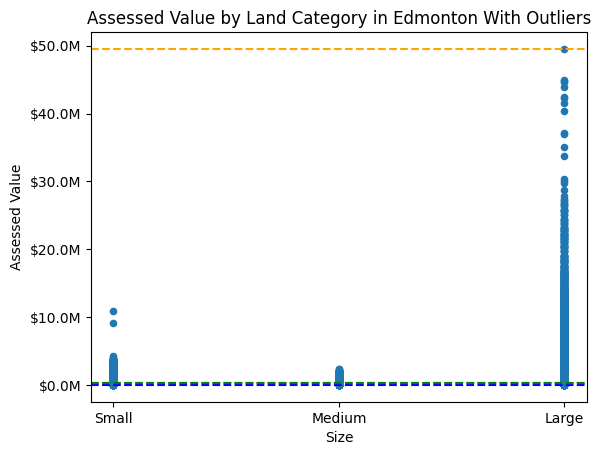

In [180]:
#Shows a graph of the land category and the asscessed value of the homes from the new merged dataFrame
merged_df_edm.plot(x='Size', y='Assessed Value', kind= 'scatter') #makes a scatter plot
plt.axhline(mean_value_land, color='red', linestyle='--', label='Mean') #plots the mean dotted line
plt.axhline(min_value_land, color='blue', linestyle='--', label='Min') #plots the min dotted line
plt.axhline(max_value_land, color='orange', linestyle='--', label='Max') #plots the max dotted line
plt.axhline(std_value_land, color='pink', linestyle='--', label='Std') #plots the standard deviation dotted line
plt.axhline(average_land, color='green', linestyle='--', label='Avg') #plots the average dotted line
plt.title("Assessed Value by Land Category in Edmonton With Outliers") # title of the graph
plt.gca().yaxis.set_major_formatter(formatter) #change values into a million dollar value
#plt.legend()
plt.show() #show graph

In [181]:
small_array = [] #creates a empty array
medium_array = [] #creates a empty array
large_array = [] #creates a empty array
countsmall= 0 #intialize to zero
countmedium = 0 #intialize to zero
countlarge =0#intialize to zero
for i in range(len(year_land_subset)): #loops thru the entire year_land_subset table
    if year_land_subset.iloc[i,2] == "Small"  : #looks at the 2nd columns of year_land_subset_cgy and if it matches with Small
         small_array.append(year_land_subset.iloc[i,0]) #if true then append the assessed value to the small_array
         countsmall = countsmall +1 #adds one to countsmall
    elif year_land_subset.iloc[i,2] == "Medium"  : #looks at the 2nd columns of year_land_subset_cgy and if it matches with Medium
         medium_array.append(year_land_subset.iloc[i,0]) #if true then append the assessed value to the medium_array
         countmedium = countmedium + 1 #adds one to countmedim
    else:
         large_array.append(year_land_subset.iloc[i,0]) #else then append the assessed value to the large_array
         countlarge = countlarge + 1 #adds one to countlarge 1

In [182]:

smalloutliers = find_outliers(small_array)
mediumoutliers = find_outliers(medium_array)
largeoutliers = find_outliers(large_array)

In [183]:
fixed_small_array = [] #creates a empty array
fixed_medium_array = [] #creates a empty array
fixed_large_array = [] #creates a empty array

for i in range(len(small_array)): #loops thru the small_array
      if smalloutliers[i] == False: #checks if the index of i in the small outlier array is false
           fixed_small_array.append(small_array[i]) #if the index of the small outlier array is false then append the index of i of the small_array to the fixed_small_array 
      else: #else move on to the next index 
               pass

for i in range(len(medium_array)): #loops thru the medium_array
      if mediumoutliers[i] == False: #checks if the index of i in the medium outlier array is false
           fixed_medium_array.append(medium_array[i]) #if the index of the medium outlier array is false then append the index of i of the medium_array to the fixed_medium_array 
      else: #else move on to the next index 
               pass

for i in range(len(large_array)): #loops thru the large_array
      if largeoutliers[i] == False: #checks if the index of i in the large outlier array is false
           fixed_large_array.append(large_array[i]) #if the index of the large outlier array is false then append the index of i of the large_array to the fixed_large_array
      else:
               pass 
			   

In [184]:
small_dataframe = pd.DataFrame({'Assessed Value' :  fixed_small_array, 'Size' : "Small"})

In [185]:
medium_dataframe = pd.DataFrame({'Assessed Value' :  fixed_medium_array, 'Size' : "Medium"})

In [186]:
large_dataframe = pd.DataFrame({'Assessed Value' :  fixed_large_array, 'Size' : "Large"})

In [187]:
merged_df_edm_size = pd.concat([small_dataframe, medium_dataframe, large_dataframe])

In [188]:
merged_df_edm_size

,Assessed Value,Size
0,206500.0,Small
1,188000.0,Small
2,213500.0,Small
3,216500.0,Small
4,204000.0,Small
...,...,...
3924,3428500.0,Large
3925,708500.0,Large
3926,594000.0,Large
3927,516500.0,Large


In [189]:
output_file_8 = 'AssessedValue_Size_EDM.csv'
merged_df_edm_size.to_csv(output_file_8)

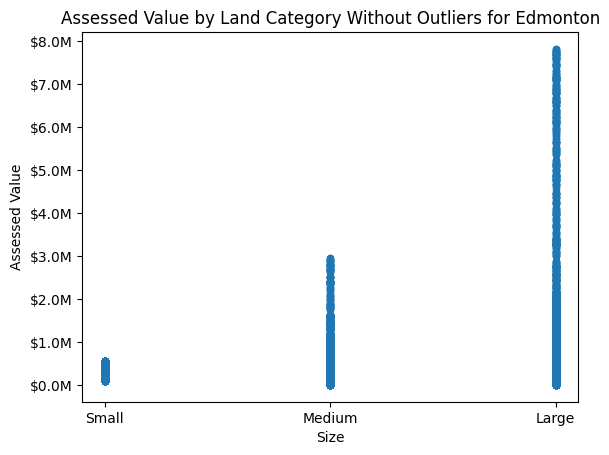

In [190]:
#Shows a graph of the homes built and the land category of the homes
merged_df_edm_size.plot(x='Size', y='Assessed Value', kind='scatter')
plt.title("Assessed Value by Land Category Without Outliers for Edmonton")
plt.gca().yaxis.set_major_formatter(formatter)
#plt.legend()
plt.show()

## Assessed Value Vs Neighbourhood in Edmonton

In [191]:
value_neighbourhood_subset_edm = residential_subset[['Assessed Value','Neighbourhood','Actual Year Built', 'Lot Size']] #filter out the table so only Assessed Value and Neighbourhood are shown

In [192]:
value_neighbourhood_subset_edm #sample of the data


,Assessed Value,Neighbourhood,Actual Year Built,Lot Size
1,275000.0,MACTAGGART,2016.0,118.525
2,177500.0,MACTAGGART,2016.0,66.805
3,484000.0,FOREST HEIGHTS,2015.0,355.992
4,331500.0,HOMESTEADER,2016.0,265.284
5,322000.0,HOMESTEADER,2016.0,207.691
...,...,...,...,...
4217606,272000.0,LAUREL,2020.0,197.666
4217607,172500.0,KESWICK AREA,NaN,367.869
4217608,128500.0,THE ORCHARDS AT ELLERSLIE,NaN,310.333
4217609,177000.0,CHAPPELLE AREA,NaN,619.282


In [193]:
len(value_neighbourhood_subset_edm) # number of rows before null values are dropped


3940427

In [194]:
value_neighbourhood_subset_drop_edm=value_neighbourhood_subset_edm.dropna() # drops rows that have null values from both columns 


In [195]:
len(value_neighbourhood_subset_drop_edm) # number of rows after null values are dropped


3779928

In [196]:
value_neighbourhood_subset_drop_edm #print table after null values are dropped


,Assessed Value,Neighbourhood,Actual Year Built,Lot Size
1,275000.0,MACTAGGART,2016.0,118.525
2,177500.0,MACTAGGART,2016.0,66.805
3,484000.0,FOREST HEIGHTS,2015.0,355.992
4,331500.0,HOMESTEADER,2016.0,265.284
5,322000.0,HOMESTEADER,2016.0,207.691
...,...,...,...,...
4217599,284500.0,ALLARD,2020.0,94.724
4217600,329000.0,CAVANAGH,2021.0,286.083
4217602,488500.0,ASTER,2022.0,362.863
4217606,272000.0,LAUREL,2020.0,197.666


In [197]:
output_file_5 = 'AssessedValue_Neighbourhood_EDM.csv'
value_neighbourhood_subset_drop_edm.to_csv(output_file_5)

In [198]:
merged_df = pd.concat([property_subset_cgy,property_subset], axis=0)

In [199]:
merged_df

,Assessed Value,Assessment Class 1,Neighbourhood,Actual Year Built,Lot Size
0,198500.0,Residential,POINT MCKAY,NaN,NaN
1,165000.0,Residential,MISSION,NaN,NaN
2,88500.0,Residential,ROCKY RIDGE,NaN,NaN
3,394000.0,Residential,ALTADORE,NaN,NaN
4,101000.0,Residential,PENBROOKE MEADOWS,NaN,NaN
...,...,...,...,...,...
4217606,272000.0,RESIDENTIAL,LAUREL,2020.0,197.666
4217607,172500.0,RESIDENTIAL,KESWICK AREA,NaN,367.869
4217608,128500.0,RESIDENTIAL,THE ORCHARDS AT ELLERSLIE,NaN,310.333
4217609,177000.0,RESIDENTIAL,CHAPPELLE AREA,NaN,619.282
